## Disease prediction assigement

In [1]:
#importing tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
data = '/Users/saragunnars/Skola/GitHub/Machine-learning-Sara-Gunnars/Data/cardio_train.csv'
df_cardio = pd.read_csv(data, sep = ';')  #seperates columns by ;

### Data cleaning

#### Data description from Kaggle
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download
1. Age | Objective | Feature | age | int (days)
2. Height | Objective | Feature height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |  1 women 2 men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [3]:
df_cardio.info()# overlook of datatypes and amounts of values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#removing Na values
df_cardio = df_cardio.dropna()

In [6]:
#converting age from days to years
df_cardio['age'] = df_cardio['age'] / 365
df_cardio['age'] = df_cardio['age'].astype(int) #removing away decimals in age by converting to int
df_cardio.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


##### Removing min blood pressure values that are unresonable

In [7]:
df_cardio.min()

id               0.0
age             29.0
gender           1.0
height          55.0
weight          10.0
ap_hi         -150.0
ap_lo          -70.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           0.0
cardio           0.0
dtype: float64

In [8]:
df_cardio['ap_hi'] = df_cardio['ap_hi'][df_cardio['ap_hi'] >= 0]
df_cardio['ap_lo'] = df_cardio['ap_lo'][df_cardio['ap_lo'] >= 0]

In [9]:
df_cardio.min()

id              0.0
age            29.0
gender          1.0
height         55.0
weight         10.0
ap_hi           1.0
ap_lo           0.0
cholesterol     1.0
gluc            1.0
smoke           0.0
alco            0.0
active          0.0
cardio          0.0
dtype: float64

##### Removing max blood pressure values that are unresonable

In [10]:
df_cardio.max()

id             99999.0
age               64.0
gender             2.0
height           250.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [11]:
df_cardio['ap_lo'] = df_cardio['ap_lo'][df_cardio['ap_lo'] < 300]
df_cardio['ap_hi'] = df_cardio['ap_hi'][df_cardio['ap_hi'] < 300]
df_cardio.max()

id             99999.0
age               64.0
gender             2.0
height           250.0
weight           200.0
ap_hi            240.0
ap_lo            190.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

###  2.0 Explorative data analysis


#### a) How many suffer from cardiovascular disease and how  many don't?

In [12]:
cardio_positive = df_cardio['cardio'][df_cardio['cardio'] == 1.0].value_counts()
cardio_negative = df_cardio['cardio'][df_cardio['cardio'] == 0.0].value_counts()

#.to_string(index=False) removes index nr and data information such as dtype
print(f"Suffer from cardiovascular disease: {cardio_positive.to_string(index=False)}")
print(f"Don't suffer from cardiovascular disease: {cardio_negative.to_string(index=False)}")


Suffer from cardiovascular disease: 34979
Don't suffer from cardiovascular disease: 35021


#### b) What proportions of the patients have normal, above normal and well above normal cholesterol values. Create piechart

In [13]:
#Amount of patients per cholesterol value category
pie_data = df_cardio.groupby(by ='cholesterol')['id'].count()
pie_data

cholesterol
1    52385
2     9549
3     8066
Name: id, dtype: int64

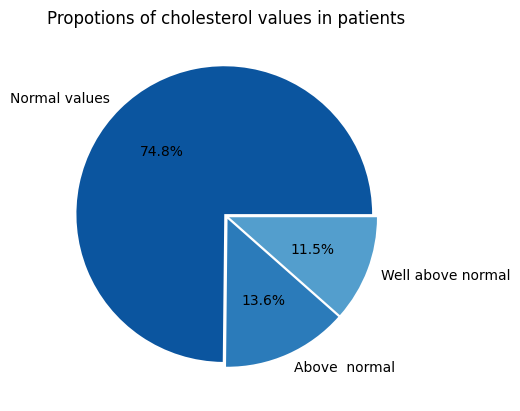

In [14]:


#creating labels and customizing chart
labels = ['Normal values', 'Above  normal', 'Well above normal']
explode = (0.02,0.02,0.02) #detatching our last slice  from the rest
percentage = '%1.1f%%'
colors = sns.color_palette('Blues_r')

#creating the  chart with our data, labels and adding percentage to it
plt.pie(pie_data, colors = colors, labels = labels, autopct= percentage, explode = explode)
plt.title('Propotions of cholesterol values in patients')



plt.show()

#### c) What is the age distribution)

In [15]:
#dist of age
df_age_dist = df_cardio.groupby(by= 'age')['id'].count()
df_age_dist.head()

age
29       3
30       1
39    1780
40    1622
41    1903
Name: id, dtype: int64

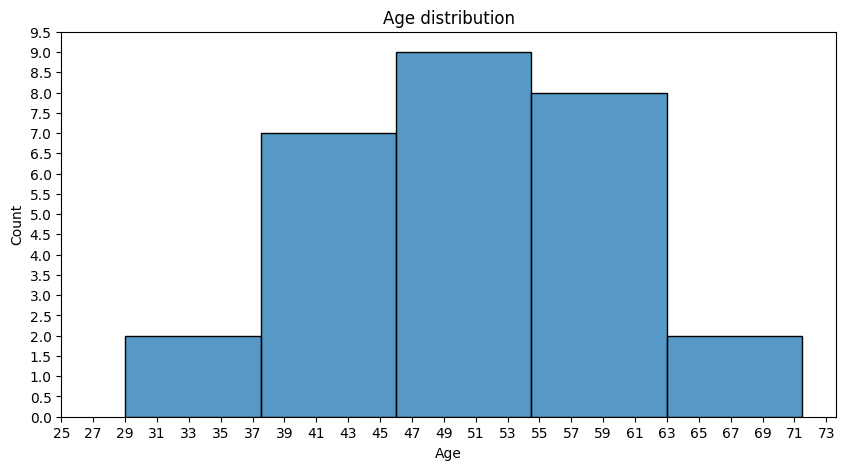

In [16]:
import numpy as  np

#plotting and customizing graph
plt.figure(figsize= (10,5))
sns.histplot(df_age_dist, x = 'age', binwidth = 8.5).set(title = 'Age distribution')
plt.xlabel("Age")

#changing ticks range  for x nd y label
plt.xticks(np.arange(25, 75, 2))
plt.yticks(np.arange(0, 10, 0.5))

plt.show()

#### d) How many are smokers?

In [17]:
#grouping data
df_smoke = df_cardio.groupby(by = 'smoke')['id'].count()
df_smoke

smoke
0    63831
1     6169
Name: id, dtype: int64

In [18]:
# calculating share and multiplying by 100 to present the percentage
smokers = (df_smoke[1]/len(df_cardio))*100
print("%.1f" % smokers, "percent are smokers")


8.8 percent are smokers


#### e) What's the weight distribution? plot appropriate chart

In [19]:
#df sorted based on weight
sorted_cardio = df_cardio.groupby(by='weight')['id'].count().to_frame().reset_index()
sorted_cardio.head(10)

,weight,id
0,10.0,1
1,11.0,1
2,21.0,1
3,22.0,1
4,23.0,1
5,28.0,1
6,29.0,1
7,30.0,3
8,31.0,1
9,32.0,3


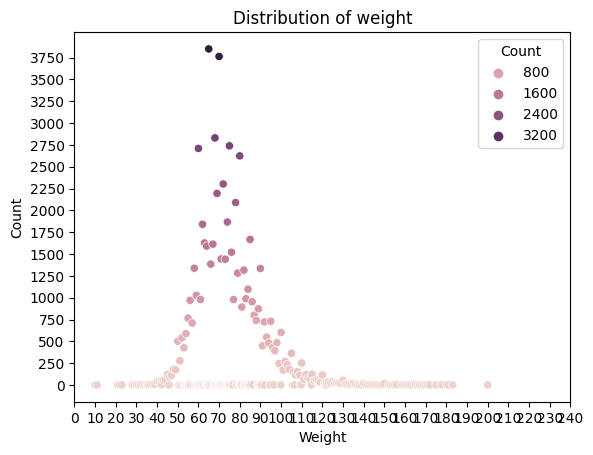

In [20]:
#style dictionary in matplotlib
from matplotlib import rcParams

sns.scatterplot(sorted_cardio, x='weight', y='id', hue = 'id')

#setting plotsize and customizing labels
rcParams['figure.figsize'] = 10,5
plt.xticks(np.arange(0,250,10))
plt.yticks(np.arange(0,4000,250))
plt.ylabel('Count')
plt.xlabel('Weight')
plt.title('Distribution of weight')
plt.legend(title = 'Count')

plt.show()

### 2.1.0 Feature engineering BMI

- Create a feature for BMI

In [21]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,2,51,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,4,47,1,156,56.0,100.0,60.0,1,1,0,0,0,0


In [22]:
#converting height to meters
df_cardio['height'] = df_cardio['height'] / 100
df_cardio.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0


In [23]:
#calculating bmi and adding column to dataframe
df_cardio['BMI'] = df_cardio['weight']/(df_cardio['height']*df_cardio['height'])
df_cardio['BMI'] = df_cardio['BMI'].round(2)
df_cardio.head()
  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.97
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.93
2,2,51,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.51
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.71
4,4,47,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.01


### cleaning out unreasonable values from the BMI set
- I looked at the BMI classifications in adults since the age ranges between 29-64.
- I decided to exklude BMI values below 10 and above 50
- Source: https://sv.wikipedia.org/wiki/BMI_(kroppsmasseindex)


In [24]:
df_bmi= df_cardio[df_cardio['BMI']< 50]
df_bmi = df_bmi[df_bmi['BMI']>=10]


In [25]:
df_bmi.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.97
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.93
2,2,51,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.51
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.71
4,4,47,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.01


### Categorize BMI 
- In groups: Underweight, Normal weight, Overweight, Obese(Class I), Obese(Class II), Obese(Class III)

In [26]:
#using numpy select to categorize weight classification
#looked up the official documentation to  see how to properly use it. Source:
#https://numpy.org/doc/stable/reference/generated/numpy.select.html
conditions = df_bmi['BMI'] < 18.5, df_bmi['BMI'] < 25, df_bmi['BMI'] < 30, df_bmi['BMI'] < 35, df_bmi['BMI'] >= 35
corr_condition = "Underweight", "Normal weight", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"
df_bmi['Classefied BMI'] = np.select(conditions, corr_condition)

In [27]:
df_bmi.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Classefied BMI
0,0,50,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.97,Normal weight
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.93,Obese (Class II)
2,2,51,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.51,Normal weight
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.71,Obese (Class I)
4,4,47,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.01,Normal weight


### 2.1.1 Feature engineering blood pressure
- Read that normal blood pressure is between 90/60 - 120/80. Therefore I will remove  values below this

In [28]:
df_health = df_bmi.query('ap_lo > 79 and ap_hi > 89' )
df_health.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,54487.000000,54487.000000,54487.000000,54487.000000,54487.00000,54487.000000,54487.000000,54487.000000,54487.000000,54487.000000,54487.000000,54487.000000,54487.000000,54487.000000
mean,49972.568961,53.322811,1.365115,1.647124,75.21105,130.398187,84.705306,1.393837,1.238461,0.089599,0.054912,0.803017,0.548645,27.762427
std,28885.757753,6.607477,0.481467,0.078580,13.97839,15.503978,7.371452,0.703759,0.586382,0.285610,0.227811,0.397723,0.497633,5.084561
min,0.000000,29.000000,1.000000,1.200000,28.00000,90.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.730000
25%,24906.500000,49.000000,1.000000,1.590000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.070000
50%,50050.000000,54.000000,1.000000,1.650000,73.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.710000
75%,74861.500000,59.000000,2.000000,1.700000,83.00000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.590000
max,99999.000000,64.000000,2.000000,2.500000,180.00000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,49.980000


#### classifying blood pressure samples in categories:
- Healthy
- Elevated
- Stage 1 hypertension
- Stage 2 hypertension
- Hypertension crisis

- According to table in this article https://www.healthline.com/health/high-blood-pressure-hypertension#symptoms

In [29]:
blood_condition = df_health['ap_hi'] < 120, df_health['ap_hi'] < 130, df_health['ap_hi'] < 140, df_health['ap_hi'] < 180, df_health['ap_hi'] >= 180 
blood_category = "Healthy", "Elevated", "Stage 1 hypertension", "Stage 2 hypertension", "Hypertension crisis"
df_health['Blood pressure Cat'] = np.select(blood_condition, blood_category)

/var/folders/_j/wrygfb3x2znc30ht6mt37s0h0000gn/T/ipykernel_28269/1459479647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_health['Blood pressure Cat'] = np.select(blood_condition, blood_category)


In [30]:
df_health.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Classefied BMI,Blood pressure Cat
0,0,50,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.97,Normal weight,Healthy
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.93,Obese (Class II),Stage 2 hypertension
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.71,Obese (Class I),Stage 2 hypertension
5,8,60,1,1.51,67.0,120.0,80.0,2,2,0,0,0,0,29.38,Obese (Class I),Elevated
6,9,60,1,1.57,93.0,130.0,80.0,3,1,0,0,1,0,37.73,Obese (Class III),Stage 1 hypertension


#### 2.2.0 Visualising diseases

In [31]:
#df with only positive for cardio disease
df_cardio_pos = df_health[df_health['cardio']==1]
df_cardio_pos.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Classefied BMI,Blood pressure Cat
1,1,55,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.93,Obese (Class II),Stage 2 hypertension
3,3,48,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.71,Obese (Class I),Stage 2 hypertension
7,12,61,2,1.78,95.0,130.0,90.0,3,3,0,0,1,1,29.98,Obese (Class I),Stage 1 hypertension
15,24,45,2,1.72,112.0,120.0,80.0,1,1,0,0,0,1,37.86,Obese (Class III),Elevated
22,32,63,1,1.58,90.0,145.0,85.0,2,2,0,0,1,1,36.05,Obese (Class III),Stage 2 hypertension


In [32]:
df_cardio_pos_grouped = df_cardio_pos.groupby(by=['Classefied BMI'], as_index= False)['cardio'].count

In [33]:
df_cardio_pos_grouped

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x131e71d00>>

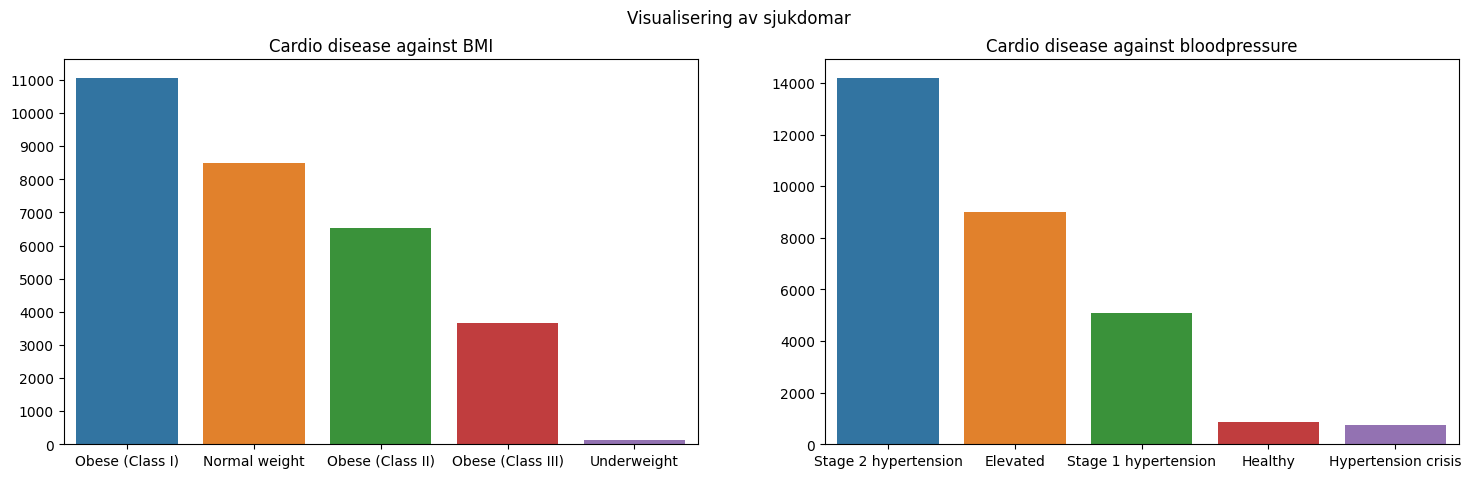

In [34]:
# creating figure and setting up two subplots
fig,axes = plt.subplots(1,2, figsize = (18,5))
#fig title
fig.suptitle("Visualisering av sjukdomar")
#subplot titles
axes[0].set_title("Cardio disease against BMI")
axes[1].set_title("Cardio disease against bloodpressure")
#customizing y-axis
axes[0].set_yticks(np.arange(0,20000,1000))

#dividing data into unique categories and sum of positive in each category
sns.barplot(ax=axes[0],  x= df_cardio_pos['Classefied BMI'].value_counts().index, y= df_cardio_pos['Classefied BMI'].value_counts().values)
sns.barplot(ax=axes[1],  x= df_cardio_pos['Blood pressure Cat'].value_counts().index, y= df_cardio_pos['Blood pressure Cat'].value_counts().values)



plt.show()

### 2.2.1 visualize correlation

/var/folders/_j/wrygfb3x2znc30ht6mt37s0h0000gn/T/ipykernel_28269/1531364518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = sns.heatmap(df_health.corr(), vmin= -1, vmax=1, annot =True)


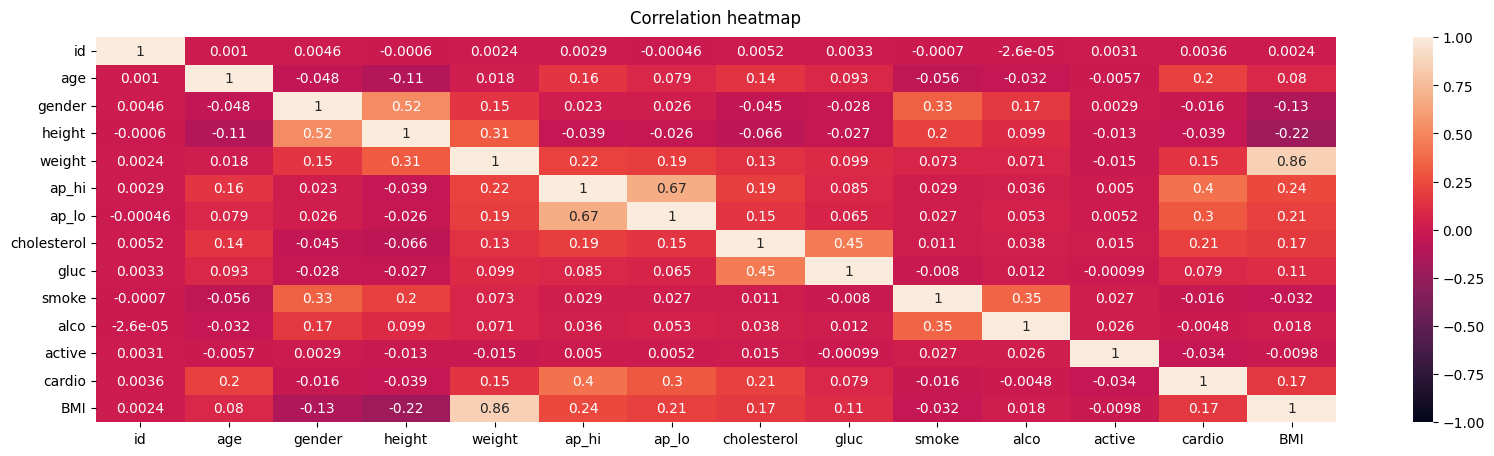

In [35]:
fig = plt.figure(figsize = (20,5))
corr_map = sns.heatmap(df_health.corr(), vmin= -1, vmax=1, annot =True)
corr_map.set_title('Correlation heatmap', pad = 10)

plt.show()


#### Comments on correlation above
- Based on above heatmap we can se that closest correlation to cardio disease are bloodpressure, cholestoral levels and age. Therefore all of these four factors combined highten the risk for cardio disease.
- The close correlaion between weight and BMI is of course because weight is a part of the function to calculate BMI

### 2.3 Create two sets of data

df_1:
- delete features ap_hi,ap_lo, height, weight, bmi
- one hot encoding  on Classefied BMI, bloodpressure Cat and gender

df_2:
- delete features Classefied BMI, Blood pressure Cat, height, weight 
- one-hot encoding on gender

In [36]:
df_1 = df_health[['id', 'gender', 'cholesterol', 'gluc','smoke','alco', 'active','cardio', 'Classefied BMI', 'Blood pressure Cat']].copy()

In [37]:
#overlooking one-hot encoding categories
print(f"Gender categories: {df_1['gender'].unique()}\n")
print(f"BMI categories: {df_1['Classefied BMI'].unique()}\n")
print(f"Blood pressure categories: {df_1['Blood pressure Cat'].unique()}")

Gender categories: [2 1]

BMI categories: ['Normal weight' 'Obese (Class II)' 'Obese (Class I)' 'Obese (Class III)'
 'Underweight']

Blood pressure categories: ['Healthy' 'Stage 2 hypertension' 'Elevated' 'Stage 1 hypertension'
 'Hypertension crisis']


In [38]:
# one-hot encoding, this will create two gender categories. We will fix this next.
df_1 = pd.get_dummies(df_1, columns = ['Classefied BMI', 'Blood pressure Cat', 'gender'])
df_1 = df_1.iloc[:, :-1] #dropping last gender column so we only have one.
df_1 = df_1.rename(columns= {"gender_1":"Gender"}) #renaming gender column

# if gender = 1 Woman otherwise man
df_1.head()

,id,cholesterol,gluc,smoke,alco,active,cardio,Classefied BMI_Normal weight,Classefied BMI_Obese (Class I),Classefied BMI_Obese (Class II),Classefied BMI_Obese (Class III),Classefied BMI_Underweight,Blood pressure Cat_Elevated,Blood pressure Cat_Healthy,Blood pressure Cat_Hypertension crisis,Blood pressure Cat_Stage 1 hypertension,Blood pressure Cat_Stage 2 hypertension,Gender
0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,1,3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1
3,3,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
5,8,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6,9,3,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1


In [39]:
#df two
df_2 = df_health[['id','age','gender','ap_hi','ap_lo', 'cholesterol', 'gluc','smoke','alco', 'active','cardio', 'BMI']].copy()

In [40]:
#one hot encoding on df_2
df_2 = pd.get_dummies(df_2, columns = ['gender'])
df_2 = df_2.iloc[:, :-1] #dropping last gender column so we only have one.
df_2 = df_2.rename(columns= {"gender_1":"Gender"}) #renaming gender column

# if gender = 1 Woman otherwise man
df_2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Gender
0,0,50,110.0,80.0,1,1,0,0,1,0,21.97,0
1,1,55,140.0,90.0,3,1,0,0,1,1,34.93,1
3,3,48,150.0,100.0,1,1,0,0,1,1,28.71,0
5,8,60,120.0,80.0,2,2,0,0,0,0,29.38,1
6,9,60,130.0,80.0,3,1,0,0,1,0,37.73,1


## 2.4 machine learning models
- Will use three different models to fit on df_1 and df_2

- Models that will be used: logistic regression, random forest and naive bayes

In [41]:
#splitting df_1 into features (X) and label(y)
X1, y1 = df_1.drop("cardio", axis = "columns"), df_1["cardio"]

#splitting df_2 into features (X) and label(y)
X2, y2 = df_2.drop("cardio", axis = "columns"), df_2["cardio"]

In [42]:
#checking to make sure everything looks good
X1.head()

,id,cholesterol,gluc,smoke,alco,active,Classefied BMI_Normal weight,Classefied BMI_Obese (Class I),Classefied BMI_Obese (Class II),Classefied BMI_Obese (Class III),Classefied BMI_Underweight,Blood pressure Cat_Elevated,Blood pressure Cat_Healthy,Blood pressure Cat_Hypertension crisis,Blood pressure Cat_Stage 1 hypertension,Blood pressure Cat_Stage 2 hypertension,Gender
0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,1,3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1
3,3,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,8,2,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6,9,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [43]:
y1.head()

0    0
1    1
3    1
5    0
6    0
Name: cardio, dtype: int64

In [44]:
X2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,Gender
0,0,50,110.0,80.0,1,1,0,0,1,21.97,0
1,1,55,140.0,90.0,3,1,0,0,1,34.93,1
3,3,48,150.0,100.0,1,1,0,0,1,28.71,0
5,8,60,120.0,80.0,2,2,0,0,0,29.38,1
6,9,60,130.0,80.0,3,1,0,0,1,37.73,1


In [45]:
y2.head()

0    0
1    1
3    1
5    0
6    0
Name: cardio, dtype: int64

#### train|validation|test split

In [46]:
from sklearn.model_selection import train_test_split

#setting the size of our train, test, and validation sets
train_size = 0.75
test_size = 0.15
valid_size = 0.10

In [47]:
#train|validation|test split on df_1
# setting the same random state for reproductible outputs
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size= 1- train_size, random_state= 30)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size= test_size /(test_size + valid_size), random_state=30)

In [48]:
#train|validation|test split on df_2
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size= 1-train_size, random_state=30)
x_valid_2, x_test_2, y_valid_2, y_test_2 = train_test_split(x_test_2, y_test_2, test_size= test_size /(test_size + valid_size), random_state= 30)

#### Feature scaling

In [49]:
#importing packages for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler for nomalizing MinMax values
scaler_norm = MinMaxScaler()
#scaler for standardizing values using the mean and standard deviation
scaler_stand = StandardScaler()

##### scaling df_1

In [50]:
#normalizing data
x_train_norm = scaler_norm.fit_transform(x_train)
x_valid_norm = scaler_norm.transform(x_valid)

print(f"x train normalized: {x_train_norm}\n")
print(f"x validation normalized: {x_valid_norm}")


x train normalized: [[0.59427189 0.         0.         ... 0.         1.         0.        ]
 [0.6350827  0.5        0.5        ... 0.         0.         1.        ]
 [0.36120722 0.         0.         ... 0.         0.         1.        ]
 ...
 [0.88228765 0.         0.         ... 0.         0.         1.        ]
 [0.08191164 0.         0.         ... 0.         0.         1.        ]
 [0.70939419 1.         1.         ... 1.         0.         1.        ]]

x validation normalized: [[0.900228   0.         0.         ... 0.         0.         1.        ]
 [0.88047761 0.         0.         ... 0.         0.         0.        ]
 [0.23210464 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.85818716 0.         0.         ... 0.         0.         1.        ]
 [0.99438989 0.         0.         ... 0.         0.         0.        ]
 [0.29299586 0.5        0.         ... 0.         0.         0.        ]]


In [51]:
#standardizing data
x_train_stand = scaler_stand.fit_transform(x_train)
x_valid_stand = scaler_stand.transform(x_valid)

print(f"x train standardized: {x_train_stand}\n")
print(f"x validation standardized: {x_valid_stand}")

x train standardized: [[ 0.32904071 -0.56295898 -0.4089863  ... -0.42684528  1.48335057
  -1.31452297]
 [ 0.47023535  0.85136038  1.28692696 ... -0.42684528 -0.67414947
   0.76073224]
 [-0.47730143 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
   0.76073224]
 ...
 [ 1.32549912 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
   0.76073224]
 [-1.44359034 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
   0.76073224]
 [ 0.72733345  2.26567973  2.98284023 ...  2.34276926 -0.67414947
   0.76073224]]

x validation standardized: [[ 1.38756802 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
   0.76073224]
 [ 1.31923688 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
  -1.31452297]
 [-0.92396224 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
  -1.31452297]
 ...
 [ 1.24211782 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
   0.76073224]
 [ 1.71334326 -0.56295898 -0.4089863  ... -0.42684528 -0.67414947
  -1.31452297]
 [-0.71329472  0.85136038 -0.4089863  ... -0.426

#### scaling df_2

In [52]:
#normalizing data
x_train_norm_2 = scaler_norm.fit_transform(x_train_2)
x_valid_norm_2 = scaler_norm.transform(x_valid_2)

#standardizing data
x_train_stand_2 = scaler_stand.fit_transform(x_train_2)
x_valid_stand_2 = scaler_stand.transform(x_valid_2)

## Model 1 - Logistical regression

- I will use this model as it predicts a binary outcome, for example 0 = no and 1 = yes. In my case  0 is healthy and 1 means sick

In [53]:
#importing Logistic regressions model
from sklearn.linear_model import LogisticRegression
#importing GridSearchCv to help determine which hyperparameters is most suitable for the model
from sklearn.model_selection import GridSearchCV

#initiation our model with default settings
log_model = LogisticRegression()

#### df_1  normalized scaled data

In [54]:
#fitting the model with our training data
log_model.fit(x_train_norm, y_train)
#printing the trained models coefficent varible and interception
log_model.coef_, log_model.intercept_

(array([[ 0.02582086,  0.97010418, -0.21628173, -0.17448486, -0.24416945,
         -0.23249611, -0.05062432,  0.12625202,  0.18008279,  0.31295679,
         -0.25476348, -0.86973683, -1.35552147,  1.36857559, -0.03279555,
          1.20338206,  0.02013681]]),
 array([0.32557744]))

In [55]:
# here i want to find out what to set our penalty, C (regulation strength) and solver parameters to.
# i will therefor create a dictianry with the different parameters options
# i used the scikit learn documentation to find the different options for parameter setting
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
param_grid_log= {"penalty": ["l1", "l2", "elasticnet", "None"], "C": [1,2,3,4,5,6,7,8,9,10], 
"solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
#loading our model, the hyperparameters we want to evaluate, crossvalidating is set to five, and the model will be refited to best parameter
classifier_log = GridSearchCV(estimator= log_model, param_grid=param_grid_log, cv = 5, scoring= "accuracy")
classifier_log

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [56]:
#fitting the train data to log reg model prefered settings
log_reg_model =classifier_log.fit(x_train_norm, y_train)

/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saragunna

In [57]:
#predicting our accuracy on the validation data
val_accuracy_norm = log_reg_model.best_estimator_.score(x_valid_norm, y_valid)
#accuracy of the training data
score_train_norm = log_reg_model.best_score_
#this is the result of our GridSearch suggesting the following settings on our model.
print(f"The best hyperparameter settings for our dataset: {log_reg_model.best_params_}")
print(f"Our training data score: {score_train_norm}")
print(f"Validation accuracy: {val_accuracy_norm}")

The best hyperparameter settings for our dataset: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
Our training data score: 0.7178025204943106
Validation accuracy: 0.7215491923641704


#### df_1  standardized scaled data

- i will repeat the above steps but with our standardized data

In [112]:
log_model = LogisticRegression()

In [59]:
#fitting the model with our training data
log_model.fit(x_train_stand, y_train)
#printing the trained models coefficent varible and interception
log_model.coef_, log_model.intercept_

(array([[ 0.007544  ,  0.3433801 , -0.06403677, -0.05024034, -0.05627731,
         -0.0926272 , -0.07184106,  0.01221358,  0.03095515,  0.06247741,
         -0.02888948, -0.42129944, -0.31519816,  0.1746336 , -0.00307597,
          0.56930832,  0.00968167]]),
 array([0.30661244]))

In [60]:
#using the same gridsearch parameters as before
classifier_log_stand = GridSearchCV(estimator= log_model, param_grid=param_grid_log, cv = 5, scoring= "accuracy")
classifier_log_stand

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [61]:
#refiting model
log_reg_model_stand =classifier_log_stand.fit(x_train_stand, y_train)

/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686,

In [62]:
#predicting our accuracy on the validation data
val_accuracy_stand = log_reg_model_stand.best_estimator_.score(x_valid_stand, y_valid)
#accuracy of the training data
score_train_stand = log_reg_model_stand.best_score_
#this is the result of our GridSearch suggesting the following settings on our model.
print(f"The best hyperparameter settings for our dataset: {log_reg_model_stand.best_params_}")
print(f"Our training data score: {score_train_stand}")
print(f"Validation accuracy: {val_accuracy_stand}")

The best hyperparameter settings for our dataset: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Our training data score: 0.7177780496757618
Validation accuracy: 0.7215491923641704


### df_2 logistical regression

- repeating the  same steps as above with dataset two

#### normalized scaling

In [113]:
log_model = LogisticRegression()

In [64]:
#fitting the model with our training data
log_model.fit(x_train_norm_2, y_train_2)
#printing the trained models coefficent varible and interception
log_model.coef_, log_model.intercept_

(array([[ 3.02291858e-02,  1.14257011e+00,  8.41944643e+00,
          2.58163767e+00,  9.35786959e-01, -2.53245584e-01,
         -1.13227817e-01, -2.24168856e-01, -2.23440260e-01,
          9.89832639e-01, -4.34933785e-05]]),
 array([-3.09659395]))

In [65]:
classifier_log2 = GridSearchCV(estimator= log_model, param_grid=param_grid_log, cv = 5, scoring= "accuracy")
classifier_log2

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [66]:
log_reg_model2 =classifier_log2.fit(x_train_norm_2, y_train_2)

/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fi

In [67]:
#predicting our accuracy on the validation data
val_accuracy2 = log_reg_model2.best_estimator_.score(x_valid_norm_2, y_valid_2)
#accuracy of the training data
score_train2 = log_reg_model2.best_score_
#this is the result of our GridSearch suggesting the following settings on our model.
print(f"The best hyperparameter settings for our dataset: {log_reg_model2.best_params_}")
print(f"Our training data score: {score_train2}")
print(f"Validation accuracy: {val_accuracy2}")

The best hyperparameter settings for our dataset: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Our training data score: 0.7195644194298298
Validation accuracy: 0.7232011747430249


#### df_2 standardized scaling

In [114]:
log_model = LogisticRegression()

In [74]:
#fitting the model with our training data
log_model.fit(x_train_stand_2, y_train_2)
#printing the trained models coefficent varible and interception
log_model.coef_, log_model.intercept_

(array([[ 8.72549068e-03,  3.02488631e-01,  8.88530942e-01,
          1.69863480e-01,  3.30244150e-01, -7.50799836e-02,
         -3.30672704e-02, -5.20494895e-02, -8.94073141e-02,
          1.27158553e-01,  3.54695475e-04]]),
 array([-3.09659395]))

In [75]:
classifier_log2_stand = GridSearchCV(estimator= log_model, param_grid=param_grid_log, cv = 5, scoring= "accuracy")
classifier_log2_stand

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [76]:
log_reg_model2_stand =classifier_log2_stand.fit(x_train_stand_2, y_train_2)

/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fi

In [77]:
#predicting our accuracy on the validation data
val_accuracy2_stand = log_reg_model2_stand.best_estimator_.score(x_valid_stand_2, y_valid_2)
#accuracy of the training data
score_train2_stand = log_reg_model2_stand.best_score_
#this is the result of our GridSearch suggesting the following settings on our model.
print(f"The best hyperparameter settings for our dataset: {log_reg_model2_stand.best_params_}")
print(f"Our training data score: {score_train2_stand}")
print(f"Validation accuracy: {val_accuracy2_stand}")

The best hyperparameter settings for our dataset: {'C': 5, 'penalty': 'l2', 'solver': 'saga'}
Our training data score: 0.7192707696072433
Validation accuracy: 0.722834067547724


### Random forest

I will now test a random forest model

In [109]:
from sklearn.ensemble import RandomForestClassifier

#imported the random forest model
model_rf = RandomForestClassifier(random_state=30)


#### df_1 normalized scaling

In [79]:
#fitting model
model_rf.fit(x_train_norm, y_train)

RandomForestClassifier(random_state=30)

In [83]:
#settinig the hyperparameters i want to search and evaluate
param_grid_rf = {"n_estimators": [50, 100, 150, 200], "criterion": ["gini", "entropy", "log_loss"], "max_features": ["auto","sqrt", "log2"]}

#our classifier
clf = GridSearchCV(model_rf, param_grid= param_grid_rf, verbose= 1, cv = 5)

#fitting classifier
clf.fit(x_train_norm, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [85]:
rf_train_score = clf.best_score_
rf_val_acc = clf.best_estimator_.score(x_valid_norm, y_valid)

print(f"The best hyperparameter settings for our dataset: {clf.best_params_}")
print(f"Our training data score: {rf_train_score}")
print(f"Validation accuracy: {rf_val_acc}")

The best hyperparameter settings for our dataset: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}
Our training data score: 0.6295607488070476
Validation accuracy: 0.6321585903083701


#### Df_1 standardized scaling

Will repeat above steps with same hyperparameters

In [143]:
model_rf = RandomForestClassifier(random_state=30)

In [144]:
model_rf.fit(x_train_stand, y_train)
clf_stand = GridSearchCV(model_rf, param_grid= param_grid_rf, verbose= 1, cv = 5)

In [88]:
#fitting classifier with standardized data
clf_stand.fit(x_train_stand, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [90]:
rf_train_score_stand = clf_stand.best_score_
rf_val_acc_stand = clf_stand.best_estimator_.score(x_valid_stand, y_valid)

print(f"The best hyperparameter settings for our dataset: {clf.best_params_}")
print(f"Our training data score: {rf_train_score_stand}")
print(f"Validation accuracy: {rf_val_acc_stand}")

The best hyperparameter settings for our dataset: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}
Our training data score: 0.6296096904441454
Validation accuracy: 0.6327092511013216


#### df_2 normalized scaling

Repeating the same steps with normalized data

In [139]:
model_rf = RandomForestClassifier(random_state=30)

In [140]:
model_rf.fit(x_train_norm_2, y_train_2)
clf2 = GridSearchCV(model_rf, param_grid= param_grid_rf, verbose= 1, cv = 5)

In [141]:
clf2.fit(x_train_norm_2, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [142]:
rf_train_score2 = clf2.best_score_
rf_val_acc2 = clf2.best_estimator_.score(x_valid_2, y_valid_2)

print(f"The best hyperparameter settings for our dataset: {clf2.best_params_}")
print(f"Our training data score: {rf_train_score2}")
print(f"Validation accuracy: {rf_val_acc2}")

The best hyperparameter settings for our dataset: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}
Our training data score: 0.7061299400464945
Validation accuracy: 0.5508443465491923


/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### df_2 standardized scaling

In [138]:
model_rf = RandomForestClassifier(random_state=30)

In [129]:
model_rf.fit(x_train_stand_2, y_train_2)
clf2_stand = GridSearchCV(model_rf, param_grid= param_grid_rf, verbose= 1, cv = 5)

In [130]:
clf2_stand.fit(x_train_stand_2, y_train_2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saragunnars/.local/share/virtualenvs/Machine-learning-Sara-Gunnars-bT69NVU4/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [136]:
rf_train_score2_stand = clf2_stand.best_score_
rf_val_acc2_stand = clf2_stand.best_estimator_.score(x_valid_stand_2, y_valid_2)

print(f"The best hyperparameter settings for our dataset: {clf2_stand.best_params_}")
print(f"Our training data score: {rf_train_score2_stand}")
print(f"Validation accuracy: {rf_val_acc2_stand}")

The best hyperparameter settings for our dataset: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}
Our training data score: 0.7058118194053591
Validation accuracy: 0.7075991189427313
